# Exploring the Ford GoBike System Data for San Francisco and Comparing with Mobi Bike Data for Vancouver
## by Amir Khanlou

## Investigation Overview

> In this study, we are looking into analysing bike sharing data. The data sets include information about individual rides made in Ford GoBike bike-sharing system covering the greater San Francisco Bay area as well as Mobibikes system covering Vancouver, BC area. The purpose of this study is to answer some general questions about the bike sharing in these 2 cities and find out the user’s behaviour during 2019 to account for seasonal changes. Year 2020 turned out to be an unusual year with COVID-19 pandemic happening and there is anecdotal information that bike riding in general increased because of the pandemic. It would be interesting to investigate this via the data available for 2020 given the data only accounts for the first 4 months of 2020. It should be noted that this data represents the bike sharing usage and the ultimate results may not be representative of the actual overall biking behaviour since the bike users may tend to avoid using shared equipment due to concern over infection and instead utilize personal bikes. Nevertheless, we look into this in hope to find some insight

## Dataset Overview

> The bike sharing system data, after cleaning, consists of information regarding 2.8 million rides in the city of San Francisco and 0.7 million entries for the city of Vancouver spanning over full year of 2019 and the first 4 months of 2020. The extracted features for analysis are duration, start time, end time, user type, time of day, day of week, month of year and year.
>
>The original data for San Francisco is downloaded from: https://www.lyft.com/bikes/bay-wheels/system-data
The data for Vancouver is downloaded from: https://www.mobibikes.ca/en/system-data
>
>The duration is a numerical, and the user type, time of day, day of week, month of year and year are categorical features where these categorial features are of interest to explore the user's behavior based on. I started with Duration to check how long the trips took and continued the investigation on the categorial variables to see if there was any dependency between them.
>
>Since we are also interested in the possible change due to COVID-19 in 2020, I also looked into yearly changes in some of these features

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_van_clean = pd.read_csv('df_van_clean.csv')
df_san_clean = pd.read_csv('df_san_clean.csv')

## Distribution of bike trips duration for the cities of San Francisco and Vanouver

Plotting on a logarithmic scale, the distribution of trip duration for both cities appear to have a perfect bell shape which is useful to know for modelling if needed. The data shows much higher counts for San Francisco and this could be due to difference in the populations of these cities

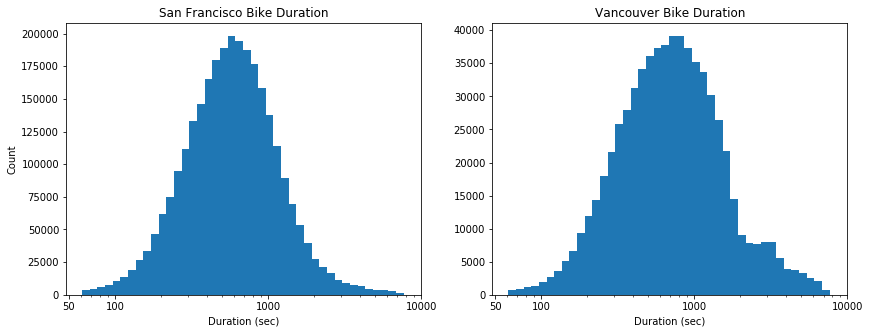

In [3]:
# Replotting above with axis transformation
plt.figure(figsize = [14, 5])
plt.subplot(1,2,1)
san_bin = 10**np.arange(1.785330, np.log10(df_san_clean.duration_sec.max()) + 0.05, 0.05)
#plt.figure(figsize=[8, 5])
plt.title('San Francisco Bike Duration')
plt.hist(data = df_san_clean, x = 'duration_sec', bins = san_bin)
plt.xscale('log')
plt.xticks([50, 100, 1000, 10000], ['50', '100', '1000', '10000'])
plt.xlabel('Duration (sec)')
plt.ylabel('Count');

plt.subplot(1,2,2)
van_bin = 10**np.arange(1.785330, np.log10(df_van_clean.duration_sec.max()) + 0.05, 0.05)
#plt.figure(figsize=[8, 5])
plt.title('Vancouver Bike Duration')
plt.hist(data = df_van_clean, x = 'duration_sec', bins = van_bin)
plt.xscale('log')
plt.xticks([50, 100, 1000, 10000], ['50', '100', '1000', '10000'])
plt.xlabel('Duration (sec)');

## Bike duration comparison between the two cities

It appears that the Vancouver riders were using the bikes for longer duration in average. 

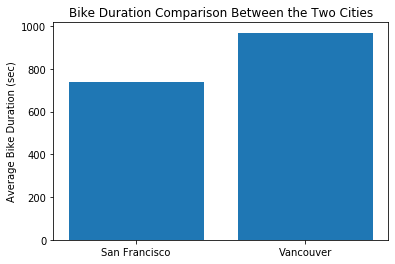

In [4]:
# Comparing the average bike time between the two cities
san_ride_time_mean = df_san_clean.duration_sec.mean()
van_ride_time_mean = df_van_clean.duration_sec.mean()
plt.title('Bike Duration Comparison Between the Two Cities')
plt.bar(x= ['San Francisco','Vancouver'], height = [san_ride_time_mean,van_ride_time_mean]);
plt.ylabel('Average Bike Duration (sec)');

## Yearly bike duration comparison
The average ride duration remained relatively constant for Vancouver from 2019 to 2020 with a slight increase. However, San Francisco showed a more significant increase (about 7%) in average ride duration in 2020.

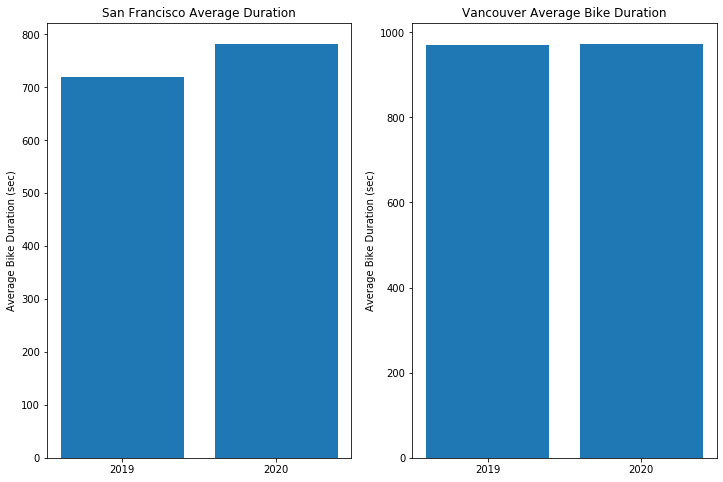

In [5]:
# Comparing the average ridership between 2019 and 2020
san_ride_time_mean_2019 = df_san_clean[df_san_clean.year == 2019].duration_sec.mean()
san_ride_time_mean_2020 = df_san_clean[df_san_clean.year == 2020].duration_sec.mean()

van_ride_time_mean_2019 = df_van_clean[df_van_clean.year == 2019].duration_sec.mean()
van_ride_time_mean_2020 = df_van_clean[df_van_clean.year == 2020].duration_sec.mean()

plt.figure(figsize = [12,8])
plt.subplot(1,2,1)
plt.bar(x= ['2019','2020'], height = [san_ride_time_mean_2019,san_ride_time_mean_2020]);
plt.ylabel('Average Bike Duration (sec)');
plt.title('San Francisco Average Duration')

plt.subplot(1,2,2)
plt.bar(x= ['2019','2020'], height = [van_ride_time_mean_2019,van_ride_time_mean_2020]);
plt.ylabel('Average Bike Duration (sec)');
plt.title('Vancouver Average Bike Duration');

## Monthly bike duration comparison
As expected, the summer months tend to show more bike rides. The peak for Vancouver is much more dominant than that in San Francisco and the reason could be the difference in the climates between the two cities. Vancouver has more precipitation in winter and fall seasons

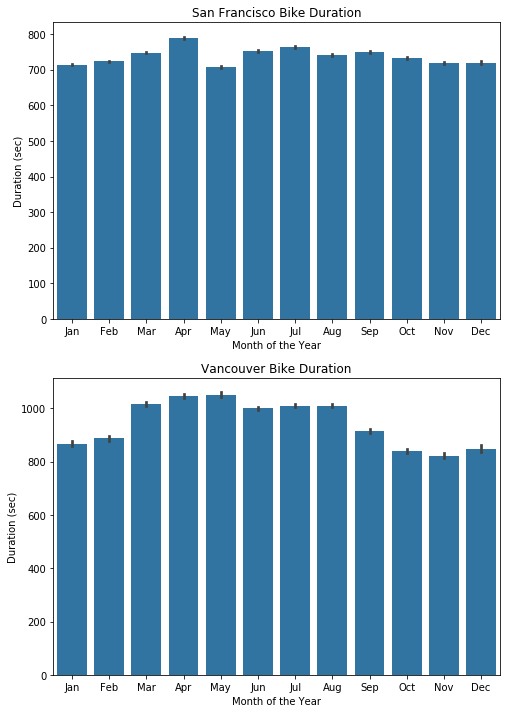

In [6]:
# Bike duration for month of the year
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

default_color = sb.color_palette()[0]
months_labels = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

sb.barplot(x="month_of_year", y="duration_sec", data=df_san_clean, color=default_color, ax = ax[0])
ax[0].set_title('San Francisco Bike Duration')
ax[0].set_xticklabels(months_labels)
ax[0].set_xlabel('Month of the Year')
ax[0].set_ylabel('Duration (sec)');

sb.barplot(x="month_of_year", y="duration_sec", data=df_van_clean, color=default_color, ax = ax[1])
ax[1].set_title('Vancouver Bike Duration')
ax[1].set_xticklabels(months_labels)
ax[1].set_xlabel('Month of the Year')
ax[1].set_ylabel('Duration (sec)');

## Daily bike duration comparison
For both cities, the users went for slightly longer ride in the weekends. While San Francisco riders kept the weekday rides essentially uniform, Vancouver riders seem to bump up the rides duration on Mondays and Fridays slightly.

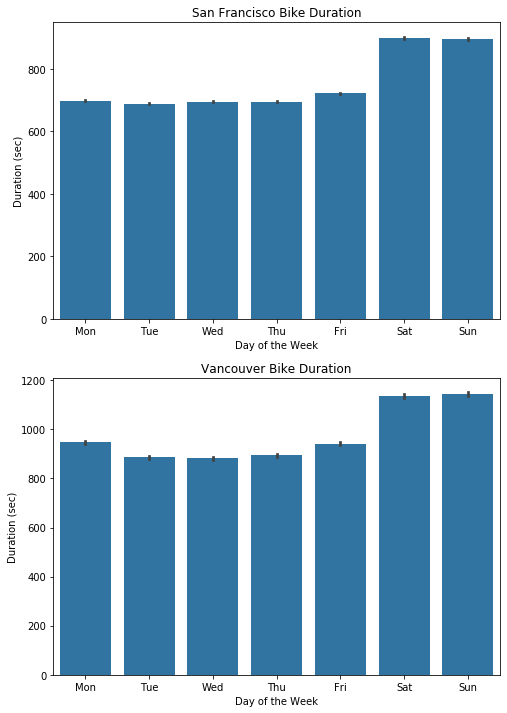

In [7]:
# Bike duration for day of the week
fig, ax = plt.subplots(nrows=2, figsize = [8,12])

default_color = sb.color_palette()[0]
week_day_labels = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']

sb.barplot(x="day_of_week", y="duration_sec", data=df_san_clean, color=default_color, ax = ax[0])
ax[0].set_title('San Francisco Bike Duration')
ax[0].set_xticklabels(week_day_labels)
ax[0].set_xlabel('Day of the Week')
ax[0].set_ylabel('Duration (sec)');

sb.barplot(x="day_of_week", y="duration_sec", data=df_van_clean, color=default_color, ax = ax[1])
ax[1].set_title('Vancouver Bike Duration')
ax[1].set_xticklabels(week_day_labels)
ax[1].set_xlabel('Day of the Week')
ax[1].set_ylabel('Duration (sec)');

## Time of day bike duration comparison for only San Francisco
Most of the biking happens in the afternoon in San Francisco. The data for the city of Vancouver lacked enough information to produce similar plot

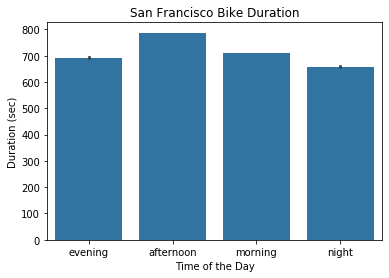

In [8]:
# Plotting trips duration per time of the day for San Francisco
df_san_clean.head()

default_color = sb.color_palette()[0]

sb.barplot(x="time_of_day", y="duration_sec", data=df_san_clean, color=default_color)
plt.title('San Francisco Bike Duration')
plt.xlabel('Time of the Day')
plt.ylabel('Duration (sec)');

## Effect of the user type on bike duration for San Francisco
non-subscribers (labeled as Customer here) are going for longer rides in San Francisco.

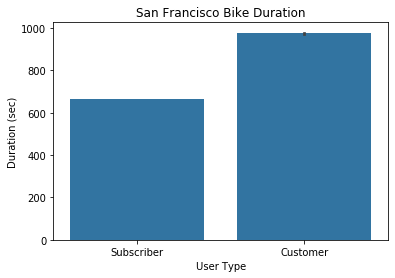

In [9]:
# Bike duration per user type for San Francisco  
sb.barplot(x="user_type", y="duration_sec", data=df_san_clean, color=default_color)
plt.title('San Francisco Bike Duration')
plt.xlabel('User Type')
plt.ylabel('Duration (sec)');

## Effect of the user type on bike duration for Vancouver
As stated above, Vancouver has a lot more user types than San Francisco users. A quick look at the chart above shows that "Single Trip Pass" are the most commonly used user type followed by "24 Hour"

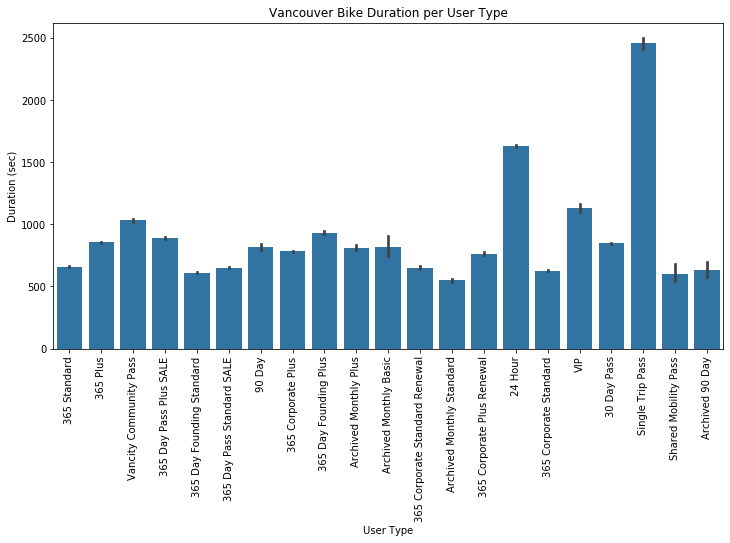

In [10]:
# Bike duration per user type for Vancouver 
plt.figure(figsize = [12,6])
sb.barplot(x="user_type", y="duration_sec", data=df_van_clean, color=default_color)
plt.title('Vancouver Bike Duration per User Type')
plt.xlabel('User Type')
plt.xticks(rotation=90)
plt.ylabel('Duration (sec)');

## Relation between day of week and user membership type in San Francisco
The customers are accounted for less numbers despite traveling for longer period as we saw above.
The subscribers however are more frequent users despite traveling less time as we also saw.

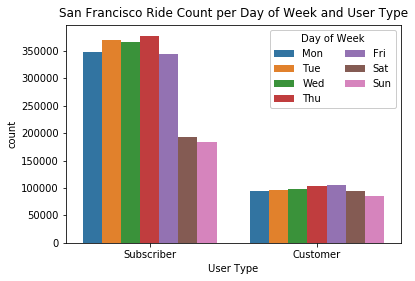

In [11]:
# Customer type relation with day of week for San Francisco
ax = sb.countplot(data = df_san_clean, x = 'user_type', hue = 'day_of_week')
ax.legend(week_day_labels, loc = 1, ncol =2, framealpha = 1, title = 'Day of Week');
plt.title('San Francisco Ride Count per Day of Week and User Type', y = 1.01);
plt.xlabel('User Type');

## Relation between time of day and user membership type in San Francisco
The heatmap below shows the use of the bikes in San Francisco peaked in the morning and afternoon and it was significantly higher with the subscribers 

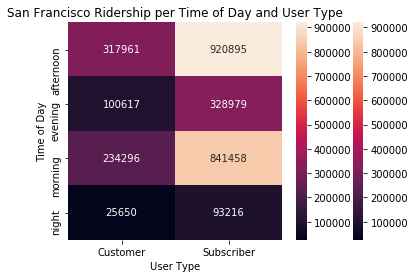

In [12]:
# Use of heat map to see the relation between time of the day and subsciption type in San Francisco
ct_counts = df_san_clean.groupby(['user_type', 'time_of_day']).size()
ct_counts = ct_counts.reset_index()
ct_counts = ct_counts.rename(columns = {0:'count'})
ct_counts = ct_counts.pivot(index = 'time_of_day', columns = 'user_type', values = 'count')
sb.heatmap(ct_counts)
sb.heatmap(ct_counts, annot = True, fmt = 'd');
plt.title('San Francisco Ridership per Time of Day and User Type', y = 1.01);
plt.xlabel('User Type')
plt.ylabel('Time of Day');

## Relation between month and year in both cities
Looking at the number of trips in different months and comparing them between 2019 and 2020 for San Francisco and Vancouver shows that in Vancouver there were many more trips that took place in the dry months however this distribution is generally flat for San Francisco in 2019.

This also shows in San Francisco the riders used the shared bikes more often in the first 4 months of 2020 comparing to 2019 while Vancouver data doesn't show much of a change for the first 4 months of the year

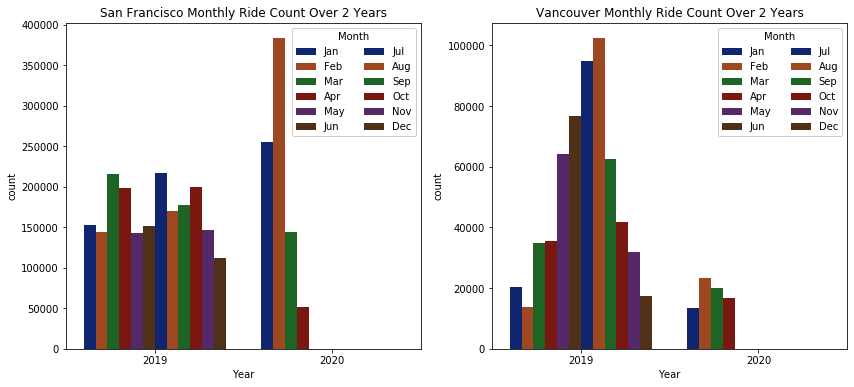

In [13]:
# Monthly relation with year 
plt.figure(figsize = [14,6])
plt.subplot(1,2,1)
ax = sb.countplot(data = df_san_clean, x = 'year', hue = 'month_of_year', palette = sb.color_palette("dark", 6))
ax.legend(months_labels, loc = 1, ncol =2, framealpha = 1, title = 'Month');
ax.set_title('San Francisco Monthly Ride Count Over 2 Years')
plt.xlabel('Year');

plt.subplot(1,2,2)
ax = sb.countplot(data = df_van_clean, x = 'year', hue = 'month_of_year', palette = sb.color_palette("dark", 6))
ax.legend(months_labels, loc = 1, ncol =2, framealpha = 1, title = 'Month');
ax.set_title('Vancouver Monthly Ride Count Over 2 Years');
plt.xlabel('Year');

## Relation between day of week and month of year in San Francisco
The heatmap below highights similar information we found earlier for San Francisco as below:

- More or less flat ride time distribution for the weekdays throughout the season
- Significant increase in the duration for the weekend
- The longest trips takes place in Saturday and Sunday of April

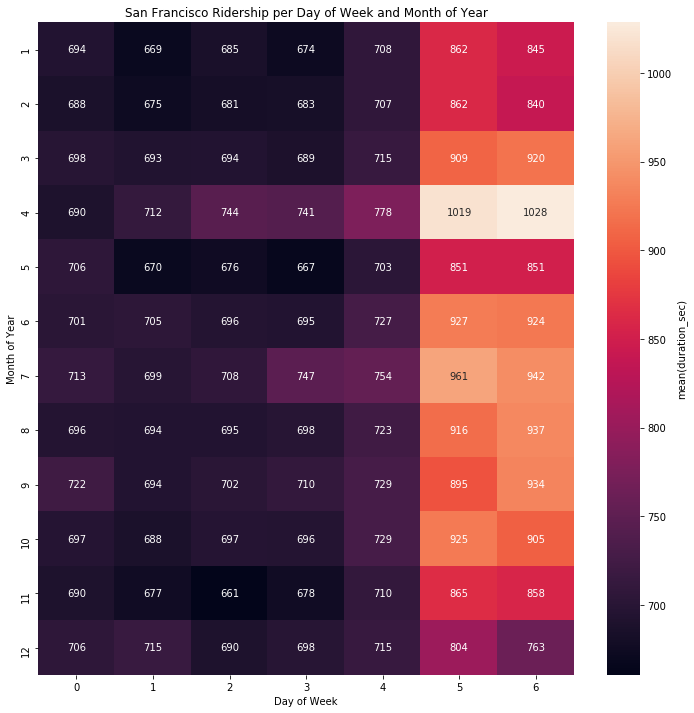

In [14]:
# Plotting the heatmap to put ridership per day of week and month of year together for San Francisco
plt.figure(figsize = [12,12])
cat_means = df_san_clean.groupby(['day_of_week', 'month_of_year']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'month_of_year', columns = 'day_of_week',
                            values = 'duration_sec_avg')
sb.heatmap(cat_means, annot = True, fmt = '.0f',cbar_kws = {'label' : 'mean(duration_sec)'})
plt.xlabel('Day of Week');
plt.ylabel('Month of Year');
plt.title('San Francisco Ridership per Day of Week and Month of Year', y = 1.01);

## Relation between day of week and month of year in Vancouver
Similarly, same information as we discovered earlier on Vancouver

- The ride time is less evenly distributed for the weekdays throughout the season and tends to climb in dry months
- Increase in the duration for the weekend but perhaps less pronounced jump when compared to San Francisco
- Longest trips take place in Saturday and Sunday of May

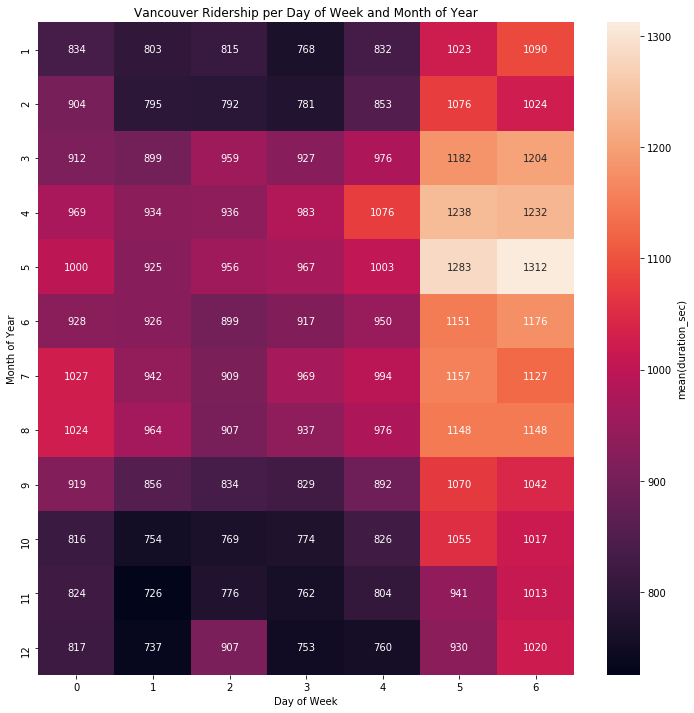

In [15]:
# Plotting the heatmap to put ridership per day of week and month of year together for Vancouver
plt.figure(figsize = [12,12])
cat_means = df_van_clean.groupby(['day_of_week', 'month_of_year']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec_avg')
cat_means = cat_means.pivot(index = 'month_of_year', columns = 'day_of_week',
                            values = 'duration_sec_avg')
sb.heatmap(cat_means, annot = True, fmt = '.0f',cbar_kws = {'label' : 'mean(duration_sec)'})
plt.xlabel('Day of Week');
plt.ylabel('Month of Year');
plt.title('Vancouver Ridership per Day of Week and Month of Year', y = 1.01);

## Relation between user type vs duration and time of day for San Francisco

This plot reconfirms that in San Francisco the longest trips took place in the afternoon and the non-subscribers generally tend to go for longer trips. One interesting outcome of the plot below is showing higher variance in the duration for the Customer user types when we look at the time of day. The subscribers seem to be more consistent with the duration and this could be due to using the bikes for cummute to work

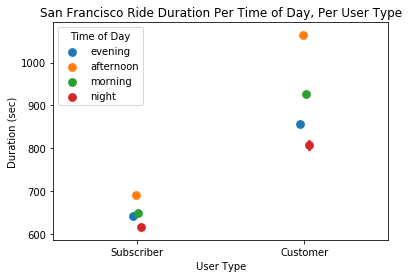

In [16]:
# Plotting the user type vs duration and time of day for San Francisco
ax = sb.pointplot(data = df_san_clean, x = 'user_type', y = 'duration_sec', hue = 'time_of_day', dodge = 0.05, linestyles = "");
ax.set_title('San Francisco Ride Duration Per Time of Day, Per User Type');
plt.xlabel('User Type');
ax.legend(title = 'Time of Day')
plt.ylabel('Duration (sec)');

## Relation between year vs duration and time of day

The bottom two plots narrate the same pattern we saw before by showing the weekend ride duration are generally longer and in 2020 the riders went for longer rides in San Francisco.
One small finding here is the level of variance in Vancouver riders which seems to be high in 2020 weekday rides

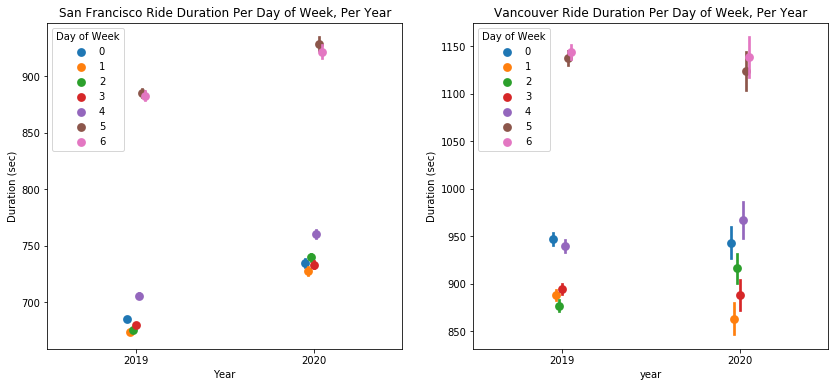

In [17]:
# Plotting the year vs duration and time of day for San Francisco
plt.figure(figsize = [14,6])
plt.subplot(1,2,1)
ax = sb.pointplot(data = df_san_clean, x = 'year', y = 'duration_sec', hue = 'day_of_week', dodge = 0.1, linestyles = "");
ax.set_title('San Francisco Ride Duration Per Day of Week, Per Year')
ax.legend(title = 'Day of Week',loc='upper left')
plt.xlabel('Year');
plt.ylabel('Duration (sec)');

# Plotting the year vs duration and time of day for Vancouver
plt.subplot(1,2,2)
ax = sb.pointplot(data = df_van_clean, x = 'year', y = 'duration_sec', hue = 'day_of_week', dodge = 0.1, linestyles = "");
ax.set_title('Vancouver Ride Duration Per Day of Week, Per Year')
ax.legend(title = 'Day of Week',loc='upper left')
plt.ylabel('Duration (sec)');